# Introduction to Statistical Learning

Chapter 1 is short and introduces some of the data, definitions on what is statistical learning, notation and book organization.

**Statistical learning** - understanding data

Two sets of tools
* **Supervised** - Model built to predict an output from a set of inputs
* **Unsupervised** - Learn underlying structure of data

The data from the books was downloaded using R. All the datasets are found in either the MASS or ISLR packages. 

## Introducing wage data

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.chdir(r'C:\Users\pigle\OneDrive\Documents\Business Analytics\Python Tutorials\Stats_Python\ALL CSV FILES - 2nd Edition')
df_wage = pd.read_csv('Wage.csv')
df_wage.head(10)
df_wage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        3000 non-null   int64  
 1   age         3000 non-null   int64  
 2   maritl      3000 non-null   object 
 3   race        3000 non-null   object 
 4   education   3000 non-null   object 
 5   region      3000 non-null   object 
 6   jobclass    3000 non-null   object 
 7   health      3000 non-null   object 
 8   health_ins  3000 non-null   object 
 9   logwage     3000 non-null   float64
 10  wage        3000 non-null   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 257.9+ KB


In [3]:
df_wage.describe(include=['object'])

,maritl,race,education,region,jobclass,health,health_ins
count,3000,3000,3000,3000,3000,3000,3000
unique,5,4,5,1,2,2,2
top,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes
freq,2074,2480,971,3000,1544,2142,2083


In [4]:
plt.style.available ##look at all available plotting styles
plt.style.use("ggplot")

In [5]:
## need to reshape data to plot correctly i.e. x axis for boxplot=education level
df_edu = df_wage.pivot(columns='education', values='wage') 
df_edu.head(15)

education,1. < HS Grad,2. HS Grad,3. Some College,4. College Grad,5. Advanced Degree
0,75.043154,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,70.476020,NaN
2,NaN,NaN,130.982177,NaN,NaN
3,NaN,NaN,NaN,154.685293,NaN
4,NaN,75.043154,NaN,NaN,NaN
5,NaN,NaN,NaN,127.115744,NaN
6,NaN,NaN,169.528538,NaN,NaN
7,NaN,NaN,111.720849,NaN,NaN
8,NaN,NaN,118.884359,NaN,NaN
9,NaN,128.680488,NaN,NaN,NaN


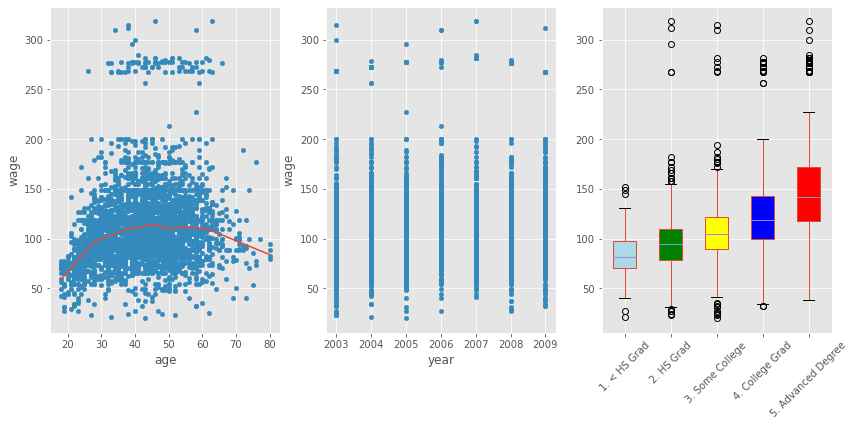

In [6]:
##importing statsmodels library to fit Locally Weighted Scatterplot Smoothing curve through data
import statsmodels.api as sm

fig, ax = plt.subplots(1,3,figsize=(14,6))
df_wage.plot.scatter(x='age',y='wage',ax=ax[0])
lowess = sm.nonparametric.lowess(df_wage['wage'],df_wage['age'], frac=0.2)
ax[0].plot(lowess[:,0],lowess[:,1])

df_wage.plot.scatter(x='year',y='wage',ax=ax[1])
year_median = df_wage.groupby('year')['wage'].median()

boxplot = df_edu.plot.box(ax=ax[2],rot=45,patch_artist=True)
colors = ['lightblue','green','yellow','blue','red']
for artist, color in zip(boxplot.artists,colors):
    artist.set_facecolor(color)

## Seaborn does it better (or not? You decide!)

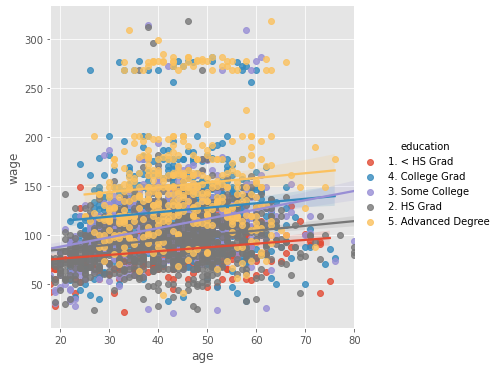

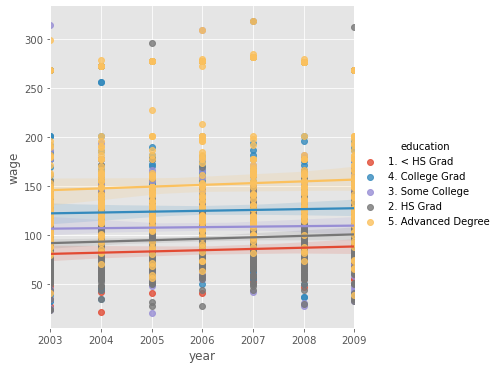

In [7]:
import seaborn as sns
sns.lmplot(x='age',y='wage',data=df_wage,hue='education')
sns.lmplot(x='year',y='wage',data=df_wage,ci=99.99,hue='education')

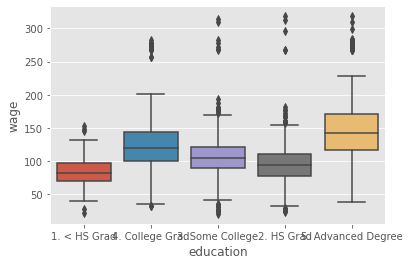

In [8]:
sns.boxplot(x='education',y='wage',data=df_wage); ##jupyter isn't supporting the legend here

In [9]:
df1 = df_wage[['age','year','education','wage']]
df_melt = pd.melt(df1, id_vars=['education','wage']) ## tidies the data by putting variables of interest in one column
df_melt.head()

,education,wage,variable,value
0,1. < HS Grad,75.043154,age,18
1,4. College Grad,70.476020,age,24
2,3. Some College,130.982177,age,45
3,4. College Grad,154.685293,age,43
4,2. HS Grad,75.043154,age,50


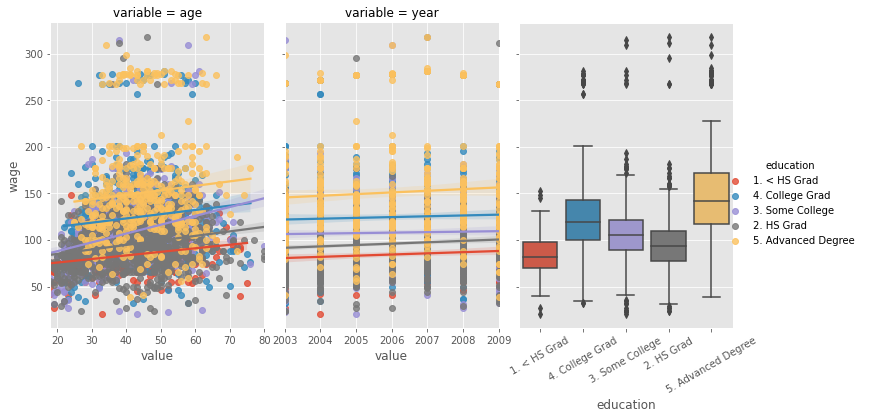

In [12]:
seaborn_grid = sns.lmplot(x='value',y='wage',col='variable',
                         hue='education',data=df_melt,sharex=False)
seaborn_grid.fig.set_figwidth(8)

left, bottom, width, height = seaborn_grid.fig.axes[0]._position.bounds
left2, bottom2, width2, height2 = seaborn_grid.fig.axes[1]._position.bounds
left_diff = left2 - left
seaborn_grid.fig.add_axes((left2 + left_diff, bottom, width, height))

sns.boxplot(x='education', y='wage', data= df_wage, ax = seaborn_grid.fig.axes[2])
ax2 = seaborn_grid.fig.axes[2]
ax2.set_yticklabels([])
ax2.set_xticklabels(ax2.get_xmajorticklabels(), rotation=30)
ax2.set_ylabel('')
ax2.set_label('');

leg = seaborn_grid.fig.legends[0]
leg.set_bbox_to_anchor([0, .1, 1.5, 1])

## Regression vs Classification

That was regression (continuous data) above and now classification below (discrete data)

In [14]:
df_smarket = pd.read_csv(r'C:\Users\pigle\OneDrive\Documents\Business Analytics\Python Tutorials\Stats_Python\ALL CSV FILES - 2nd Edition\smarket.csv')
df_smarket.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [15]:
## again puts all lags in single column to 'tidy' the data
df_smarket_pivot = pd.melt(df_smarket, 
                           id_vars='Direction', 
                           value_vars=['Lag1', 'Lag2', 'Lag3'], 
                           var_name='Lag Type', 
                           value_name='% Change')
df_smarket_pivot.head()

,Direction,Lag Type,% Change
0,Up,Lag1,0.381
1,Up,Lag1,0.959
2,Down,Lag1,1.032
3,Up,Lag1,-0.623
4,Up,Lag1,0.614


C:\Users\pigle\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


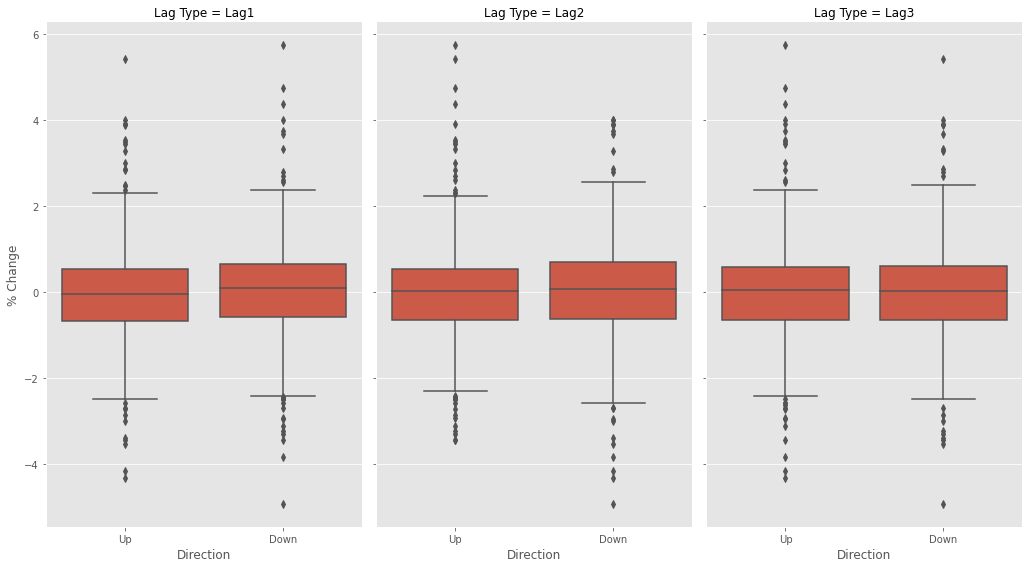

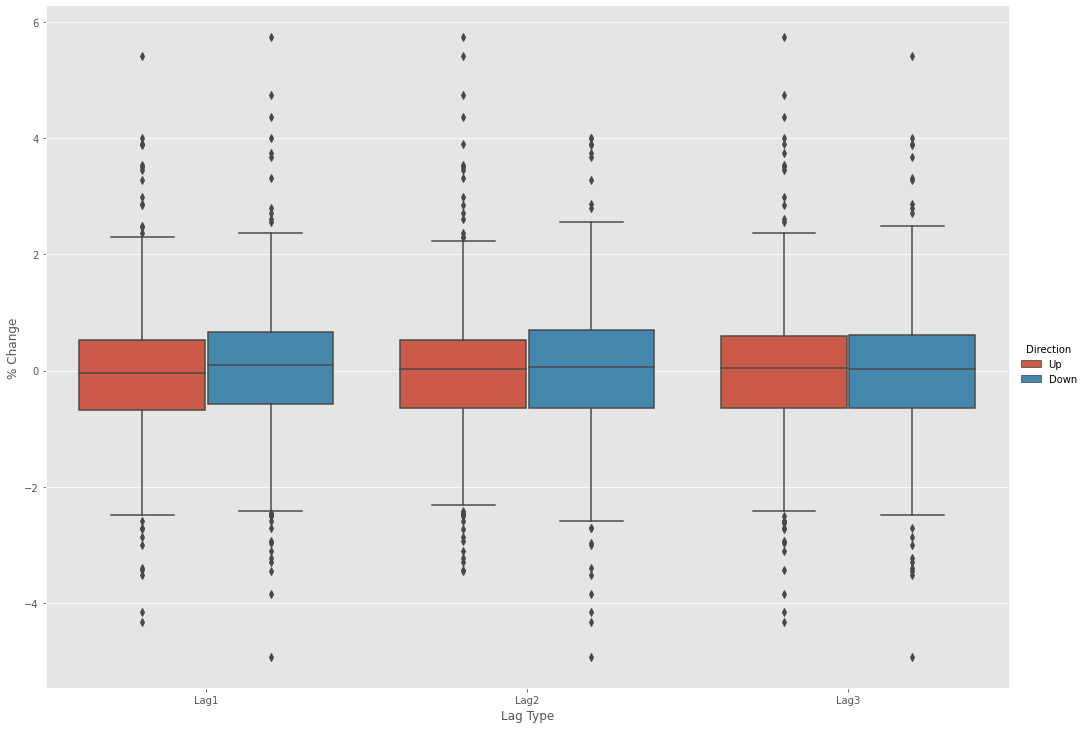

In [16]:
g = sns.FacetGrid(data = df_smarket_pivot, col="Lag Type", height=8, aspect=.6)
g = g.map(sns.boxplot,"Direction","% Change") ## ignore 'order' warning, y-axis is continuous data type

sns.catplot(x='Lag Type', y='% Change', hue='Direction',data=df_smarket_pivot,
               kind='box',height=10,aspect=1.4)

## Clustering 

In [17]:
df_genes = pd.read_csv(
    r'C:\Users\pigle\OneDrive\Documents\Business Analytics\Python Tutorials\Stats_Python\ALL CSV FILES - 2nd Edition\nci60_data.csv',
    index_col = 0)
df_genes.head()

,1,2,3,4,5,6,7,8,9,10,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
V1,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,-0.654980,...,-0.990020,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000
V2,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,-0.285019,...,-0.270058,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039
V3,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,0.475019,...,0.319981,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000
V4,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,0.095019,...,-1.240020,-0.110000,-0.160000,0.095000,-0.350019,-0.300000,-1.150010,1.090000,-0.260000,-1.100000
V5,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,1.490019,...,0.554980,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000


In [18]:
from sklearn.decomposition import PCA 
pca = PCA (2) ## dimension reduction
df_genes_transformed = pd.DataFrame(pca.fit_transform(df_genes),columns=['PC1','PC2'])
from sklearn.cluster import KMeans

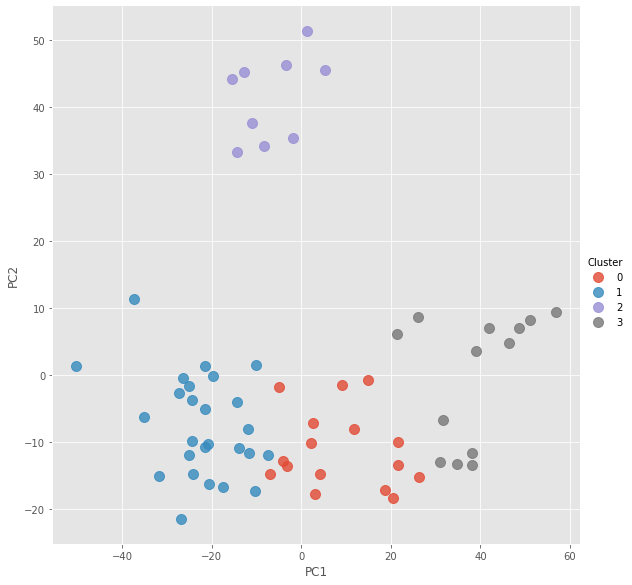

In [19]:
kmeans = KMeans(4)
kmeans.fit(df_genes_transformed)
kmeans.labels_
df_genes_transformed['Cluster']=kmeans.labels_
sns.lmplot(data=df_genes_transformed,x='PC1',y='PC2', fit_reg=False,hue='Cluster',
           height=8,scatter_kws={'marker': 'D','s':100})